# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Medida-de-similaridade-entre-tentativas-de-diferentes-durações" data-toc-modified-id="Medida-de-similaridade-entre-tentativas-de-diferentes-durações-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Medida de similaridade entre tentativas de diferentes durações</a></div><div class="lev3 toc-item"><a href="#Medida-através-da-distância-euclideana-e-distância-de-mahalanobis" data-toc-modified-id="Medida-através-da-distância-euclideana-e-distância-de-mahalanobis-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Medida através da distância euclideana e distância de mahalanobis</a></div><div class="lev3 toc-item"><a href="#As-medidas" data-toc-modified-id="As-medidas-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>As medidas</a></div><div class="lev1 toc-item"><a href="#Usando-a-distância-de-Mahalanobis" data-toc-modified-id="Usando-a-distância-de-Mahalanobis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Usando a distância de Mahalanobis</a></div><div class="lev1 toc-item"><a href="#Rato-7" data-toc-modified-id="Rato-7-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rato 7</a></div><div class="lev1 toc-item"><a href="#Rato-8" data-toc-modified-id="Rato-8-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rato 8</a></div><div class="lev1 toc-item"><a href="#Rato-9" data-toc-modified-id="Rato-9-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rato 9</a></div><div class="lev1 toc-item"><a href="#Rato-10" data-toc-modified-id="Rato-10-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rato 10</a></div><div class="lev1 toc-item"><a href="#Repetição-sem-normalização-das-linhas" data-toc-modified-id="Repetição-sem-normalização-das-linhas-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Repetição sem normalização das linhas</a></div><div class="lev1 toc-item"><a href="#Rato-7" data-toc-modified-id="Rato-7-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Rato 7</a></div><div class="lev1 toc-item"><a href="#Rato-8" data-toc-modified-id="Rato-8-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Rato 8</a></div><div class="lev1 toc-item"><a href="#Rato-9" data-toc-modified-id="Rato-9-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Rato 9</a></div><div class="lev1 toc-item"><a href="#Rato-10" data-toc-modified-id="Rato-10-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Rato 10</a></div><div class="lev3 toc-item"><a href="#Bakhurin" data-toc-modified-id="Bakhurin-1101"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span>Bakhurin</a></div><div class="lev1 toc-item"><a href="#Cálculo-pelo-método-de-um-a-um" data-toc-modified-id="Cálculo-pelo-método-de-um-a-um-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Cálculo pelo método de um-a-um</a></div><div class="lev1 toc-item"><a href="#Rato-7" data-toc-modified-id="Rato-7-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Rato 7</a></div><div class="lev1 toc-item"><a href="#Rato-9" data-toc-modified-id="Rato-9-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Rato 9</a></div><div class="lev1 toc-item"><a href="#Rato-10" data-toc-modified-id="Rato-10-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Rato 10</a></div>

# Medida de similaridade entre tentativas de diferentes durações
### Medida através da distância euclideana e distância de mahalanobis
- Foram selecionadas as tentativas com duração $t_{short} \in [1300,2300]ms$ e  $t_{long} \in [2800,3800]ms$
- A atividade foi convolucionada com kernel gaussiano de $\sigma_{kernel}=100$ms.
- A atividade motora $\textbf{não foi descartada}$.
- A atividade foi dividida em bins de 50ms, sendo utilizados 20 bins para as tentativas curtas, e 60 para as longas.

### As medidas
- Para cada um dos instantes i = 1, 2,..., o vetor médio das atividades foi utilizado como template $\tau_i$ para comparação.
- Para cada instante j, cada tentativa $\mathscr{t} \in \mathscr{T}$(o subconjunto de tentativas) foi comparada aos templates, e a distância média $E_{\mathscr{t}}[dist(\tau_{\mathscr{t}i}, \tau_j)]$ foi calculada. O elemento ij da matriz de similaridade corresponde ao inverso dessa distância. Em palavras, a coluna da matriz corresponde ao template sendo utilizado, e a linha corresponde aos dados de atividade.
- As medidas de distância utilizadas foram a euclideana, $$D_e(\vec{u},\vec{v}) = ||\vec{u}-\vec{v}||$$ e a de mahalanobis $$ D_m(\vec{u},\vec{v}) = \sqrt{(\vec{u}-\vec{v})^T\textbf{S}^{-1}(\vec{u}-\vec{v})}$$ sendo $\textbf{S}^{-1}$ a matriz de precisão, ou o inverso da matriz de covariância calculada sobre as tentativas $\mathscr{T}$

In [1]:
from spikeHelper.visuals import crossSimilarities
from spikeHelper.dataOrganization import XyTfromEpoch
import pickle
%matplotlib inline

In [2]:
def nbinDuration(duration,binSize=50,baseline=500):
    return (duration+baseline)/binSize
    

In [3]:
nbinDuration(2800)

66.0

# Usando a distância de Mahalanobis

# Rato 7

In [4]:
rat = 7
data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 29
Number of times 20
Number of trials 534

Tentativas longas
Number of neurons 29
Number of times 50
Number of trials 90


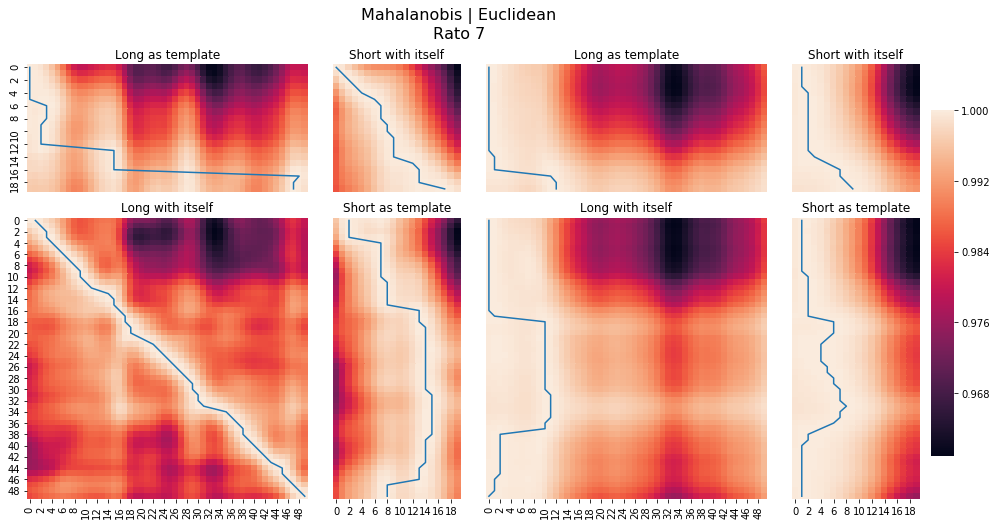

In [5]:
crossSimilarities(short,long,'Rato 7')

# Rato 8

In [6]:
rat = 8
data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 37
Number of times 20
Number of trials 356

Tentativas longas
Number of neurons 37
Number of times 50
Number of trials 64


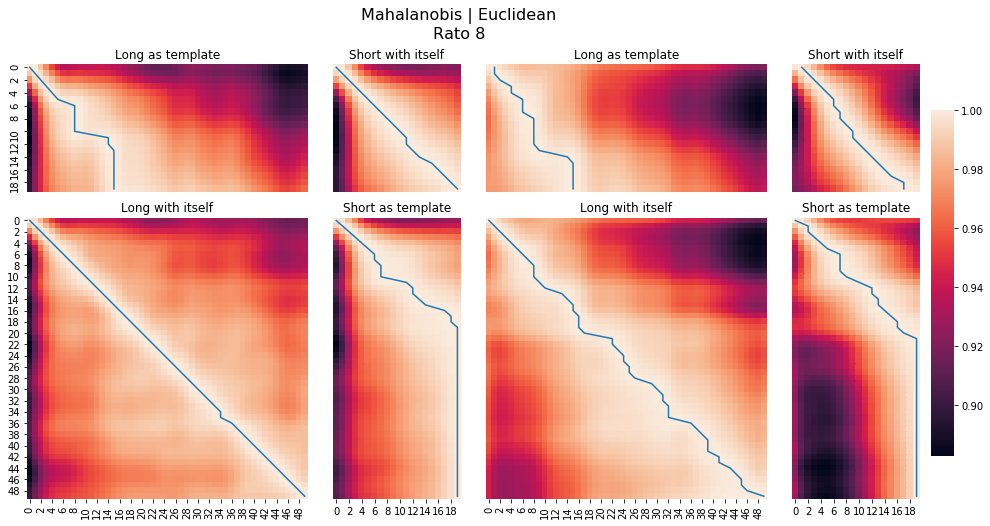

In [7]:
crossSimilarities(short,long,'Rato 8')

# Rato 9

In [8]:
rat = 9 

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 29
Number of times 20
Number of trials 267

Tentativas longas
Number of neurons 29
Number of times 50
Number of trials 99


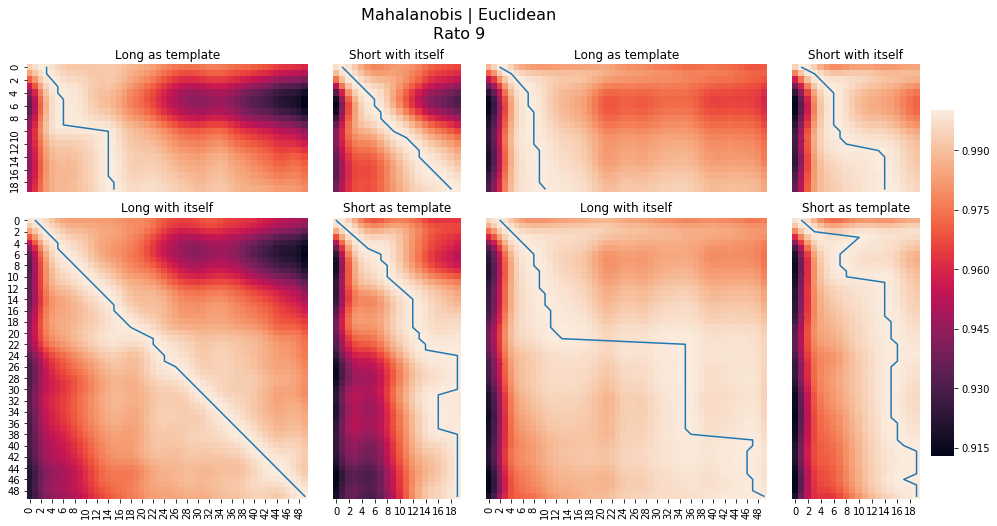

In [9]:
crossSimilarities(short,long,'Rato 9')

# Rato 10

In [10]:
rat = 10

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 65
Number of times 20
Number of trials 809

Tentativas longas
Number of neurons 65
Number of times 50
Number of trials 121


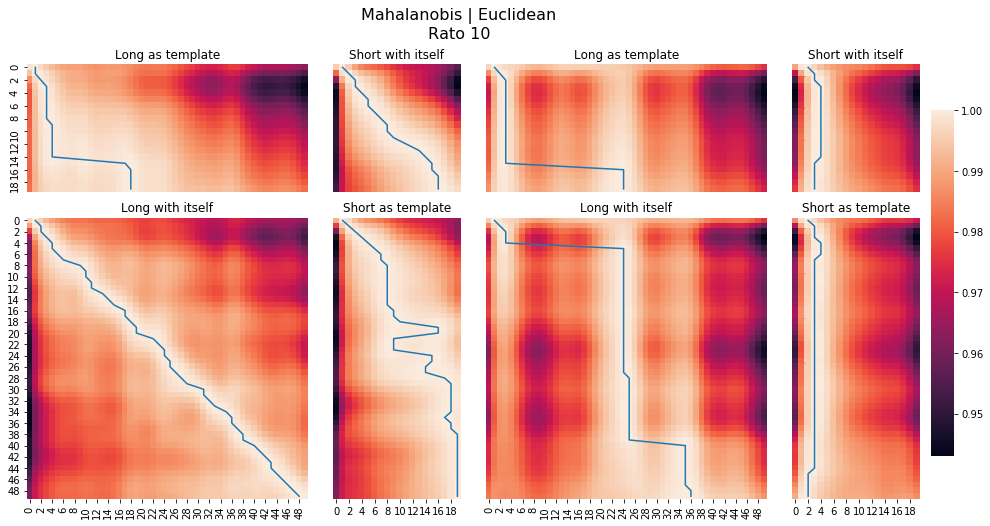

In [11]:
crossSimilarities(short,long,'Rato 10')

---

# Repetição sem normalização das linhas

# Rato 7

In [12]:
rat = 7

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 29
Number of times 20
Number of trials 534

Tentativas longas
Number of neurons 29
Number of times 50
Number of trials 90


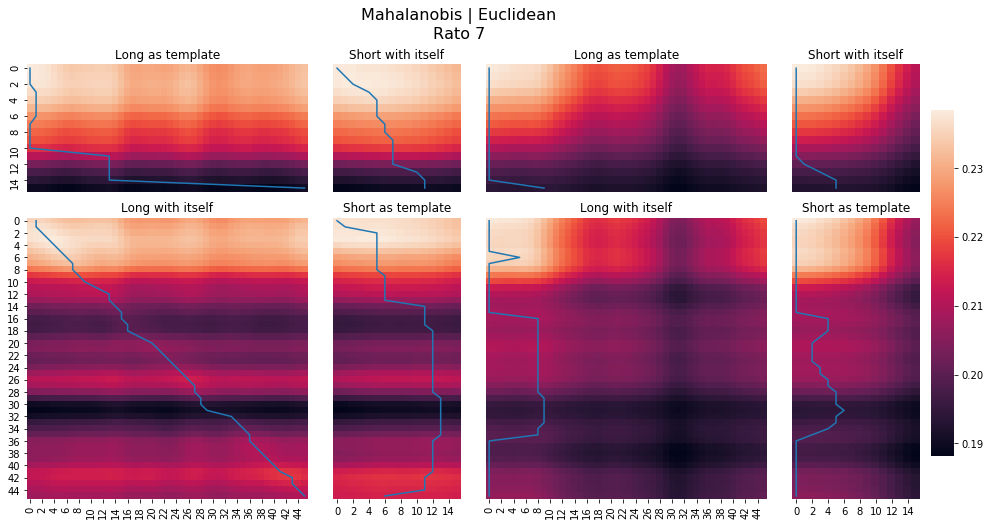

In [13]:
crossSimilarities(short[:,2:-2,:],long[:,2:-2,:],'Rato 7' ,normalize=False)

# Rato 8

In [14]:
rat = 8

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 37
Number of times 20
Number of trials 356

Tentativas longas
Number of neurons 37
Number of times 50
Number of trials 64


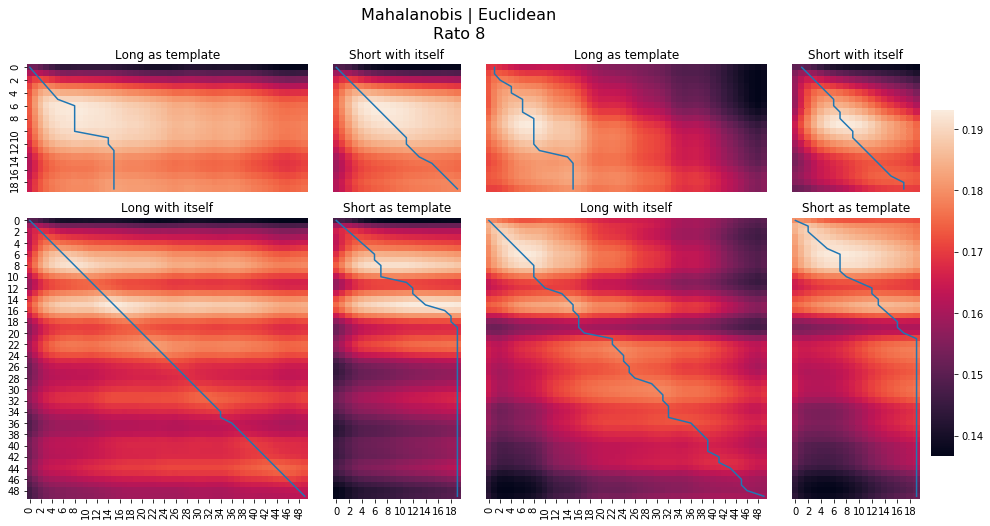

In [15]:
crossSimilarities(short,long,'Rato 8' ,normalize=False)

# Rato 9

In [16]:
rat = 9

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 29
Number of times 20
Number of trials 267

Tentativas longas
Number of neurons 29
Number of times 50
Number of trials 99


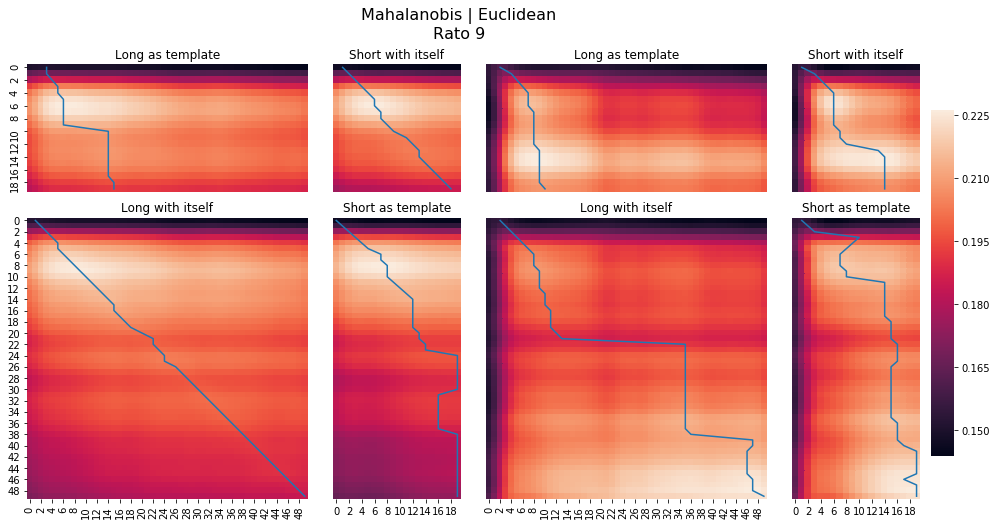

In [17]:
crossSimilarities(short,long,'Rato 9' ,normalize=False)

# Rato 10

In [18]:
rat = 10

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 65
Number of times 20
Number of trials 809

Tentativas longas
Number of neurons 65
Number of times 50
Number of trials 121


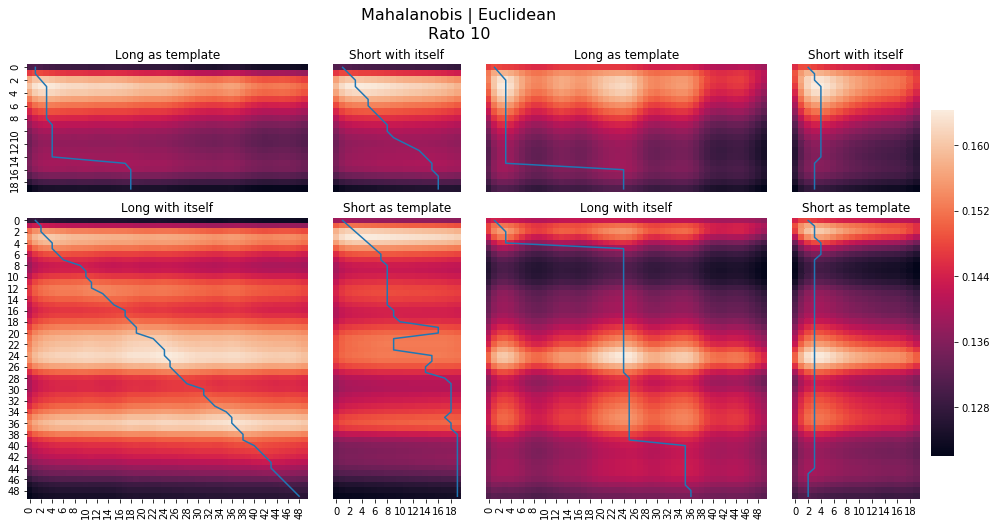

In [19]:
crossSimilarities(short,long,'Rato 10' ,normalize=False)

---

### Bakhurin
O método usado por Bakurin et al.(2017) para o cálculo de temporal warping é diferente do nosso. Ele diz ter criado uma matriz 2500x2500, comparando a atividade convolucionada porém não binnada. Ele não deixa claro (pelo menos não para mim) se ele usou algum método de 'templates', como o nosso, ou se ele fez uma comparação um-a-um entre todos os bins de cada tempo. Essa forma um-a-um parece ser um cálculo melhor da similaridade real, porém necessita em nosso caso de aproximadamente $10^4$ medidas de distância para cada elemento da matriz, e portanto ~$10^7$ comparações para a geração de cada matriz. 
Imaginei que esse número seria maior. Devo fazer o método um-a-um e testar o tempo necessario para rodar.
Usando uma precisão temporal de 1ms como a do Bakhurin parece ser irreal no entanto, e necessitaria de ~$10^{10}$ distâncias por matriz

O tempo de demora para geração de cada matriz utilizando os dados binados é de aproximadamente 2 minutos. No meu computador, isso significaria ~80 horas se utilizássemos precisão de 1ms, o que indica que esse não deve ter sido o método utilizado pelo Bakhurin(ou que ele tenha um algoritmo muito mais eficiente para esse cálculo).

Síntese: N de operações ~ $$Template=O(n_{trials}n_{times}^2)$$ $$1a1=O(n_{trials}^2n_{times}^2)$$

|Método|Template|1a1 binado|1a1 preciso|
|------|------|------|------|
|Operações|$10^5$|$10^7$|$10^{10}$|
|Tempo| 1s*|2min*|80h|

$\tiny{\textit{(Valores estimados grosseiramente para nossa quantidade de dados)}}$
$\tiny{\textit{(*Valores empíricos)}}$


Bakhurin, Konstantin I., et al. "Differential encoding of time by prefrontal and striatal network dynamics." Journal of Neuroscience 37.4 (2017): 854-870

# Cálculo pelo método de um-a-um
Esses não estão funcionando direito. Ou estao?

# Rato 7

In [20]:
rat = 7 

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 29
Number of times 20
Number of trials 534

Tentativas longas
Number of neurons 29
Number of times 50
Number of trials 90


CPU times: user 58min 7s, sys: 8.65 s, total: 58min 16s
Wall time: 58min 13s


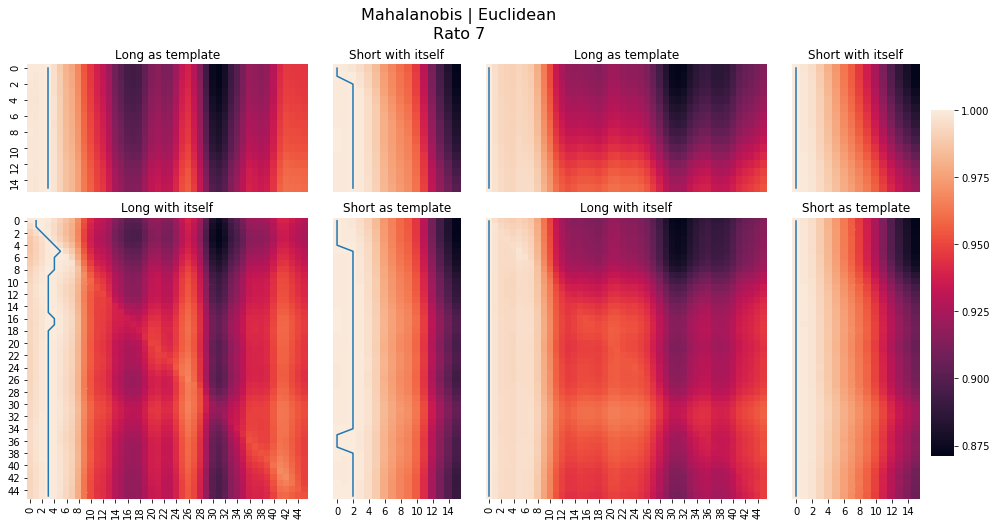

In [21]:
%time crossSimilarities(short[:,2:-2,:],long[:,2:-2,:],'Rato 7',oneToOne=True)

CPU times: user 20.4 s, sys: 3.88 s, total: 24.3 s
Wall time: 19.9 s


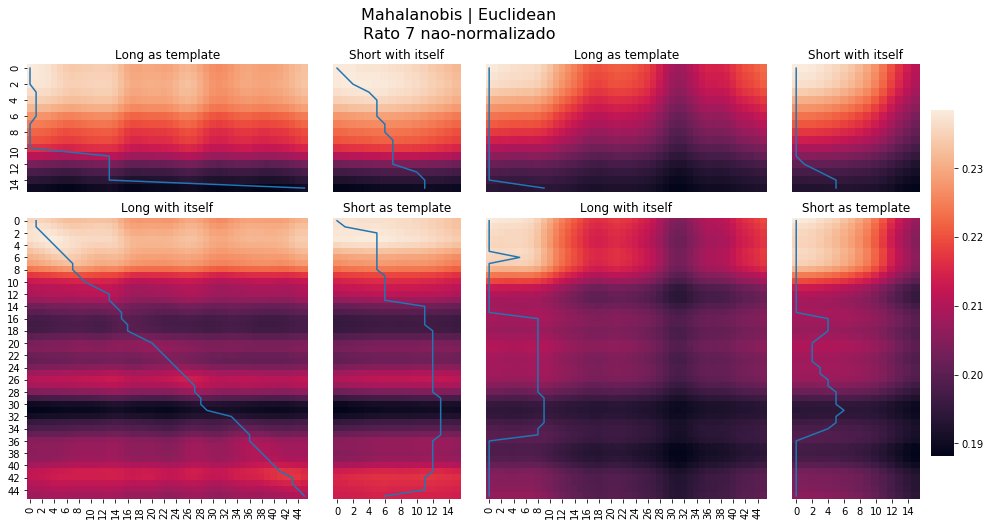

In [22]:
%time crossSimilarities(short[:,2:-2,:],long[:,2:-2,:],'Rato 7 nao-normalizado',normalize=False)

In [23]:
rat = 8

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 37
Number of times 20
Number of trials 356

Tentativas longas
Number of neurons 37
Number of times 50
Number of trials 64


CPU times: user 19.7 s, sys: 3.34 s, total: 23 s
Wall time: 19.1 s


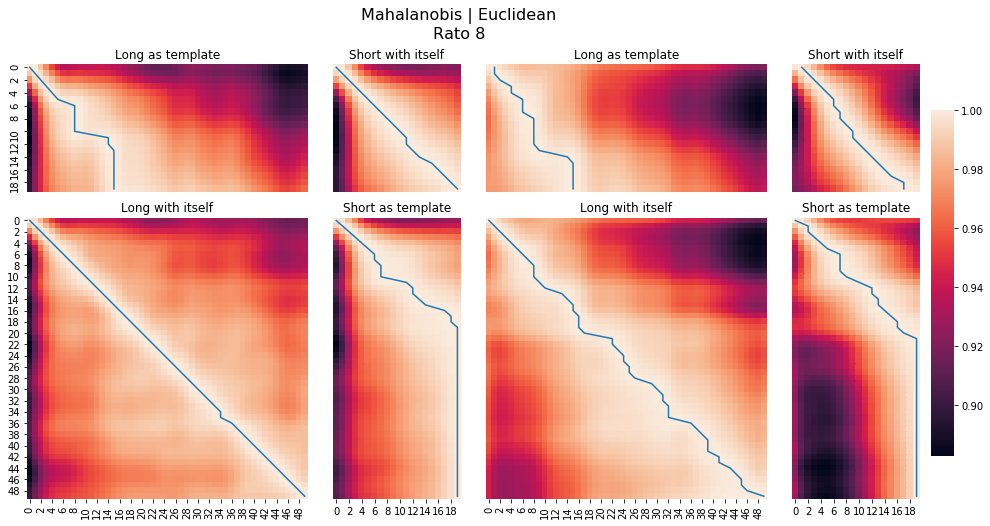

In [24]:
%time crossSimilarities(short,long,'Rato 8')

# Rato 9

In [25]:
rat = 9 

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 29
Number of times 20
Number of trials 267

Tentativas longas
Number of neurons 29
Number of times 50
Number of trials 99


CPU times: user 19.7 s, sys: 3.64 s, total: 23.3 s
Wall time: 19.2 s


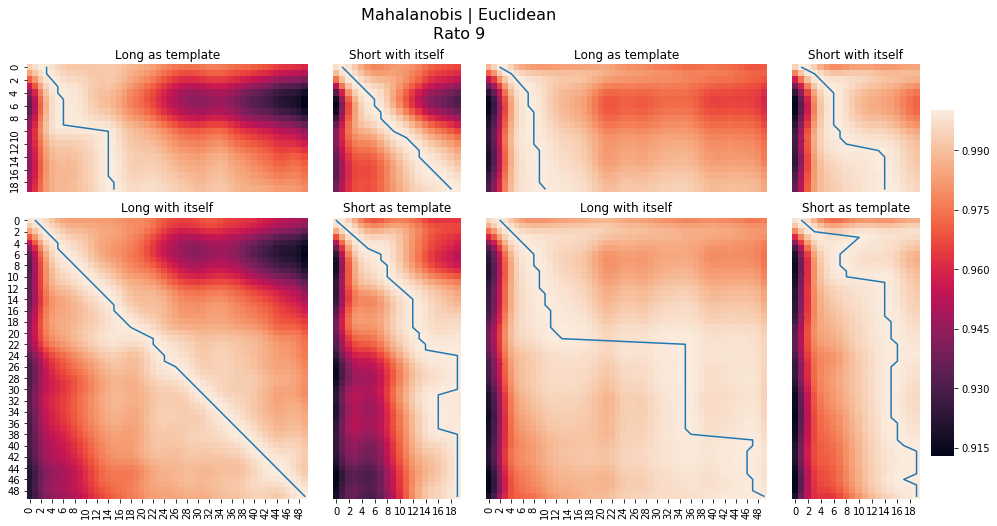

In [26]:
%time crossSimilarities(short,long,'Rato 9')

# Rato 10

In [27]:
rat = 10

data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))

short = XyTfromEpoch(data,getBins=[10,30], minBins= 36, maxBins = 56)[:,:,:]
long = XyTfromEpoch(data,getBins=[10,60], minBins= 66, maxBins = 86)[:,:,:]
print('Tentativas curtas')
print('Number of neurons',short.shape[0])
print('Number of times',short.shape[1])
print('Number of trials',short.shape[2])
print('\nTentativas longas')
print('Number of neurons',long.shape[0])
print('Number of times',long.shape[1])
print('Number of trials',long.shape[2])

Minimum size restricted. Using all up from  36
Maximum size restricted. Using all up to  56
Minimum size restricted. Using all up from  66
Maximum size restricted. Using all up to  86
Tentativas curtas
Number of neurons 65
Number of times 20
Number of trials 809

Tentativas longas
Number of neurons 65
Number of times 50
Number of trials 121


CPU times: user 40.5 s, sys: 3.92 s, total: 44.5 s
Wall time: 39.9 s


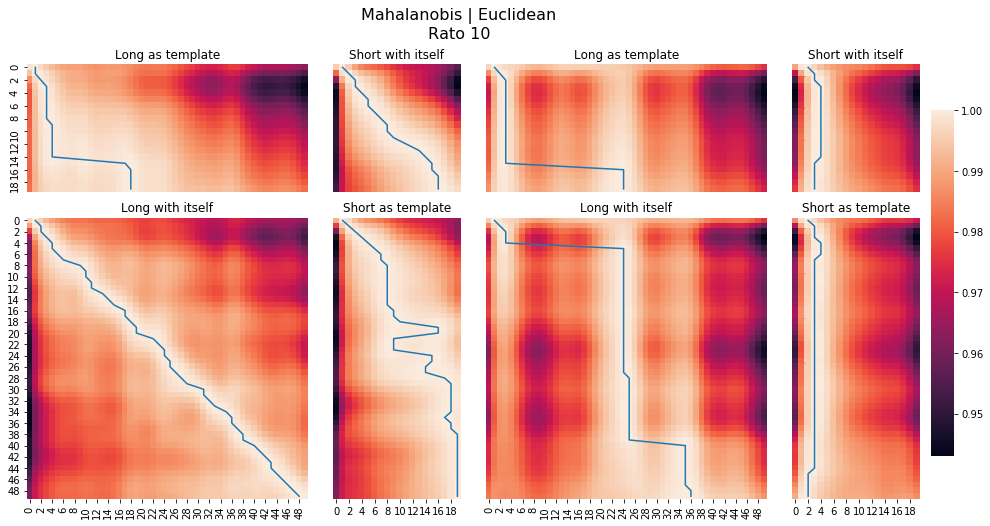

In [28]:
%time crossSimilarities(short,long,'Rato 10')